In [ ]:
# Импортируем необходимые библиотеки и модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import chi2_contingency

In [ ]:
# Считываем данные и записываем в df
df = pd.read_csv('Исходные данные.csv')
df.head()

<ipython-input-40-3c76baef1d8f>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Исходные данные.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df_t7 = df.copy() #для 7 задания, так как там нужен признак с выбросами, а в 6 номере мы их убираем и заменяем на NaN

**Задание №1.**

Вывести информацию о наборе данных.

In [ ]:
df.info() #Выводим информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

**Задание №2.**

Определить наличие ошибочных записей в признаках.
Исправить ошибочные записи, либо заменить ошибочные записи пропусками.

Признак по варианту: Num_of_Delayed_Payment

In [ ]:
df['Num_of_Delayed_Payment'].head(10) #Смотрим первые 10 записей признака Num_of_Delayed_Payment

0      7
1    NaN
2      7
3      4
4    NaN
5      4
6     8_
7      6
8      4
9      1
Name: Num_of_Delayed_Payment, dtype: object

In [ ]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.replace('_','').values # Заменяем все _ на пустоту, избавляясь от некорректно написанных чисел
df['Num_of_Delayed_Payment'].head(10) #Смотрим первые 10 записей признака Num_of_Delayed_Payment

0      7
1    NaN
2      7
3      4
4    NaN
5      4
6      8
7      6
8      4
9      1
Name: Num_of_Delayed_Payment, dtype: object

**Задание №3.**

В соответствии с вариантом преобразовать признаки, которые должны быть количественными в числовой формат.

Признак по варианту: Num_of_Delayed_Payment



In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float) # Преобразуем значения в столбце к типу float
df_t7['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'] # Копируем преобразованный столбец 'Num_of_Delayed_Payment' в DataFrame df_t7
df['Num_of_Delayed_Payment'].info() # Выводим информацию о столбце


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Delayed_Payment
Non-Null Count  Dtype  
--------------  -----  
92998 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


**Задание №4.**

Для всех вариантов преобразовать признак "Credit_History_Age" в числовой формат (месяцы).



In [ ]:
df[['Month', 'Credit_History_Age', 'Customer_ID']][:8] # Просматриваем первые 10 записей признаков

,Month,Credit_History_Age,Customer_ID
0,January,22 Years and 1 Months,CUS_0xd40
1,February,NaN,CUS_0xd40
2,March,22 Years and 3 Months,CUS_0xd40
3,April,22 Years and 4 Months,CUS_0xd40
4,May,22 Years and 5 Months,CUS_0xd40
5,June,22 Years and 6 Months,CUS_0xd40
6,July,22 Years and 7 Months,CUS_0xd40
7,August,NaN,CUS_0xd40


In [ ]:
df['Month_Number'] = df['Month'].apply(lambda x: pd.to_datetime(x, format='%B').month) #Создаем столбец Month_Number, содержащий номер месяца из столбца Month
df[['Month', 'Credit_History_Age', 'Customer_ID', 'Month_Number']][:8] # Просматриваем первые 10 записей признаков

,Month,Credit_History_Age,Customer_ID,Month_Number
0,January,22 Years and 1 Months,CUS_0xd40,1
1,February,NaN,CUS_0xd40,2
2,March,22 Years and 3 Months,CUS_0xd40,3
3,April,22 Years and 4 Months,CUS_0xd40,4
4,May,22 Years and 5 Months,CUS_0xd40,5
5,June,22 Years and 6 Months,CUS_0xd40,6
6,July,22 Years and 7 Months,CUS_0xd40,7
7,August,NaN,CUS_0xd40,8


In [ ]:
def years(value): # Обозначаем функцию для подсчета года
  if pd.isna(value): # Если значение  является NaN
    return None # Возвращает значение NaN, как оно есть
  return int(value.split(' ')[0]) * 12 # Иначе разбиваем значение "value" по пробелу, берем первый элемент,
                                       #преобразуем его в целое число и умножаем на 12, возвращая результат
df['Credit_History_Age'] = df['Credit_History_Age'].apply(years) # Применяем функцию к каждому значению столбца Credit_History_Age
df['Credit_History_Age'] # Просматриваем преобразованный столбец

0        264.0
1          NaN
2        264.0
3        264.0
4        264.0
         ...  
99995    372.0
99996    372.0
99997    372.0
99998    372.0
99999    372.0
Name: Credit_History_Age, Length: 100000, dtype: float64

In [ ]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.fillna(x.value_counts().idxmax())) # Заменяем пропущенные значения в столбце 'Credit_History_Age' на моду в каждой группе
df['Credit_History_Age'] = df['Credit_History_Age'] + df['Month_Number'] # Прибавляем к полученному в столбце значению года месяц
df['Credit_History_Age'] = df['Credit_History_Age'].astype(int) #Преобразовываем столбец в целочисленный тип
df['Credit_History_Age'] #смотрим итоговый столбец

0        265
1        266
2        267
3        268
4        269
        ... 
99995    376
99996    377
99997    378
99998    379
99999    380
Name: Credit_History_Age, Length: 100000, dtype: int64

**Задание №5.**

Определить наличие аномальных значений, которые не соответствуют физической природе признаков.

Признак по варианту: Num_Credit_Card

Заменить аномальные значения пропусками.


In [ ]:
df['Num_Credit_Card'].info() # Просматриваем информацию о столбце Num_Credit_Card

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_Credit_Card
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


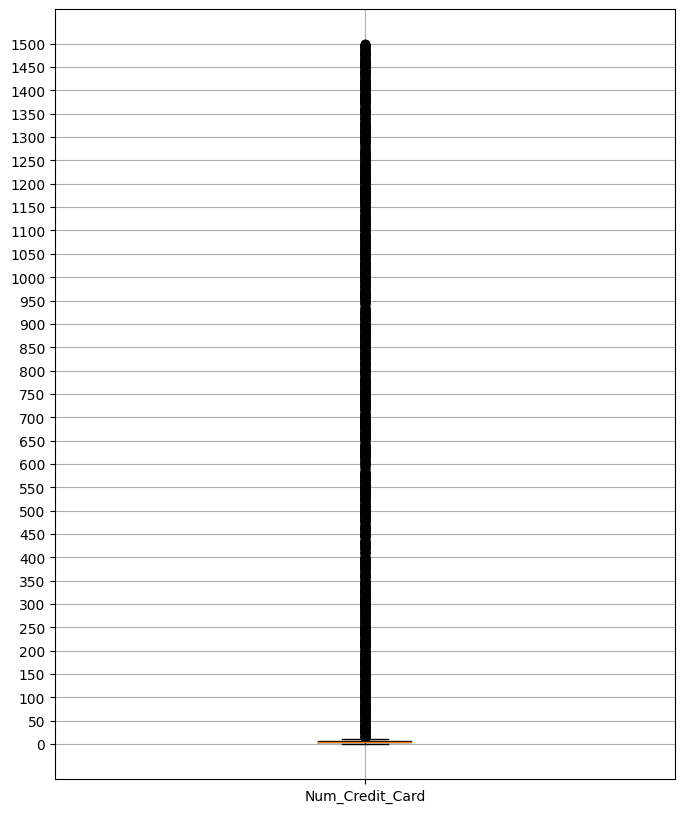

In [ ]:
plt.figure(figsize = (8,10)) # Создаем новую фигуру для графика
plt.boxplot(df['Num_Credit_Card'], labels = ['Num_Credit_Card']) # Строим ящик с усами (boxplot) для данных в столбце 'Num_Credit_Card'
plt.yticks(np.arange(0,1550, 50))  # Устанавливаем метки на оси y от 0 до 1550 с шагом 50
plt.grid()  # Добавляем сетку на график

In [ ]:
Q1 = df['Num_Credit_Card'].quantile(0.25)  # Вычисляем первый квартиль (25-й процентиль) для столбца 'Num_Credit_Card'
Q3 = df['Num_Credit_Card'].quantile(0.75)  # Вычисляем третий квартиль (75-й процентиль) для столбца 'Num_Credit_Card'
IQR = Q3 - Q1  # Вычисляем межквартильный размах (IQR)

# Определяем границы аномальных значений
lower_bound = Q1 - 1.5 * IQR  # Нижняя граница для определения выбросов (1.5 IQR ниже первого квартиля)
upper_bound = Q3 + 1.5 * IQR  # Верхняя граница для определения выбросов (1.5 IQR выше третьего квартиля)

# Заменяем аномальные значения на NaN
df['Num_Credit_Card'] = np.where((df['Num_Credit_Card'] < lower_bound) | (df['Num_Credit_Card'] > upper_bound), np.nan, df['Num_Credit_Card'])  # Заменяем значения, выходящие за границы выбросов, на NaN
df['Num_Credit_Card'].info()  # Выводим информацию о столбце 'Num_Credit_Card' после замены выбросов

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_Credit_Card
Non-Null Count  Dtype  
--------------  -----  
97729 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


**Задание №6.**

Восстановить пропущенные значения признака.
Сравнить распределения признака до и после восстановления.

Признаки по варианту: Num_of_Delayed_Payment, Amount_invested_monthly

Для всех вариантов восстановить пропущенные значения признака Type_of_Loan.


In [ ]:
df[['Num_of_Delayed_Payment', 'Amount_invested_monthly', 'Type_of_Loan']].info() #Смотрим информацию по столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Num_of_Delayed_Payment   92998 non-null  float64
 1   Amount_invested_monthly  95521 non-null  object 
 2   Type_of_Loan             88592 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
# Избавляемся от выбросов признака Num_of_Delayed_Payment
Q1_NoD = df['Num_of_Delayed_Payment'].quantile(0.25)  # Вычисляем первый квартиль (25-й процентиль) для столбца 'Num_of_Delayed_Payment'
Q3_NoD = df['Num_of_Delayed_Payment'].quantile(0.75)  # Вычисляем третий квартиль (75-й процентиль) для столбца 'Num_of_Delayed_Payment'
IQR_NoD = Q3_NoD - Q1_NoD  # Вычисляем межквартильный размах (IQR) для столбца 'Num_of_Delayed_Payment'

# Определяем границы аномальных значений
lower_bound_NoD = Q1_NoD - 1.5 * IQR_NoD  # Нижняя граница для определения выбросов (1.5 IQR ниже первого квартиля)
upper_bound_NoD = Q3_NoD + 1.5 * IQR_NoD  # Верхняя граница для определения выбросов (1.5 IQR выше третьего квартиля)

# Заменяем аномальные значения на NaN
df['Num_of_Delayed_Payment'] = np.where((df['Num_of_Delayed_Payment'] < lower_bound_NoD) | (df['Num_of_Delayed_Payment'] > upper_bound_NoD), np.nan, df['Num_of_Delayed_Payment'])  # Заменяем значения, выходящие за границы выбросов, на NaN

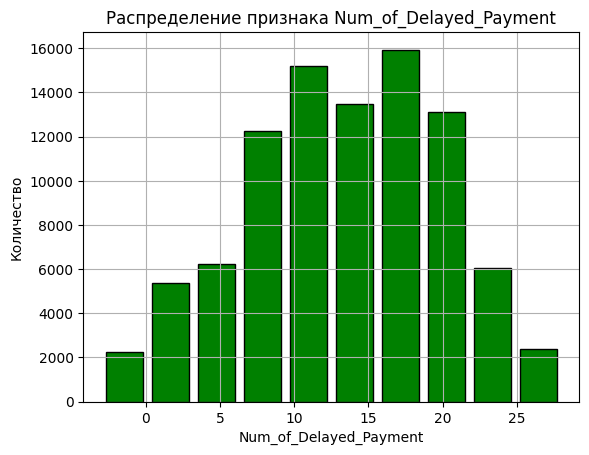

In [ ]:
# Строим гистограмму распределения признака Num_of_Delayed_Payment
plt.hist(df['Num_of_Delayed_Payment'], bins = 10, rwidth = 0.8, edgecolor = 'black', color = 'g')
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Количество')
plt.title('Распределение признака Num_of_Delayed_Payment')
plt.grid()

In [ ]:
re_df = df.copy() #Создаем копию датафрейма для восстановления данных
re_df['Num_of_Delayed_Payment']  = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(x.median()))  # Заполняем пропущенные значения в столбце 'Num_of_Delayed_Payment' медианой, группируя по столбцу Customer_ID

In [ ]:
re_df['Num_of_Delayed_Payment'].info() #Убедимся, что все значения восстановлены

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Delayed_Payment
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


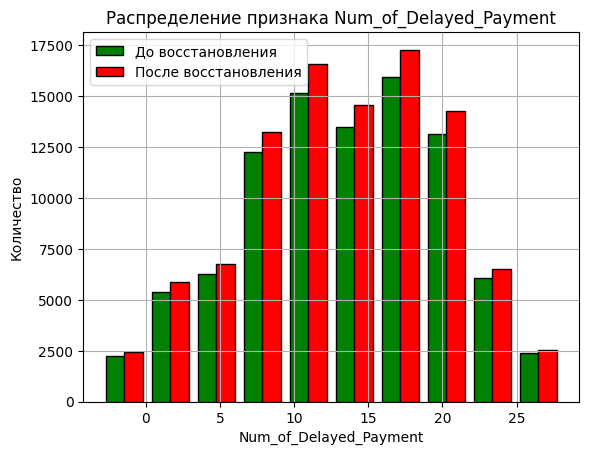

In [ ]:
# Строим 2 гистограммы: восстановленный и не восстановленный признак
plt.hist([df['Num_of_Delayed_Payment'], re_df['Num_of_Delayed_Payment']], color = ['g', 'r'], edgecolor = 'black', rwidth = 0.8)
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Количество')
plt.title('Распределение признака Num_of_Delayed_Payment')
plt.grid()
plt.legend(['До восстановления', 'После восстановления'])

In [ ]:
df['Amount_invested_monthly'].value_counts() # Смотрим, какие есть значения в столбце Amount_invested_monthly

Amount_invested_monthly
__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: count, Length: 91049, dtype: int64

In [ ]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.replace('_','').values # Заменяем все _ на пустоту, исправляя ошибки
df['Amount_invested_monthly'].value_counts() # Смотрим, какие теперь есть значения в столбце Amount_invested_monthly

Amount_invested_monthly
10000                 4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: count, Length: 91049, dtype: int64

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float) # Меняем тип столбца на float

Q1_Aim = df['Amount_invested_monthly'].quantile(0.25)  # Вычисляем первый квартиль (25-й процентиль) для столбца 'Amount_invested_monthly'
Q3_Aim = df['Amount_invested_monthly'].quantile(0.75)  # Вычисляем третий квартиль (75-й процентиль) для столбца 'Amount_invested_monthly'
IQR_Aim = Q3_Aim - Q1_Aim  # Вычисляем межквартильный размах (IQR) для столбца 'Amount_invested_monthly'

# Определяем границы аномальных значений
lower_bound_Aim = Q1_Aim - 1.5 * IQR_Aim  # Нижняя граница для определения выбросов (1.5 IQR ниже первого квартиля)
upper_bound_Aim = Q3_Aim + 1.5 * IQR_Aim  # Верхняя граница для определения выбросов (1.5 IQR выше третьего квартиля)

# Заменяем аномальные значения на NaN
df['Amount_invested_monthly'] = np.where((df['Amount_invested_monthly'] < lower_bound_Aim) | (df['Amount_invested_monthly'] > upper_bound_Aim), np.nan, df['Amount_invested_monthly'])  # Заменяем значения, выходящие за границы выбросов, на NaN

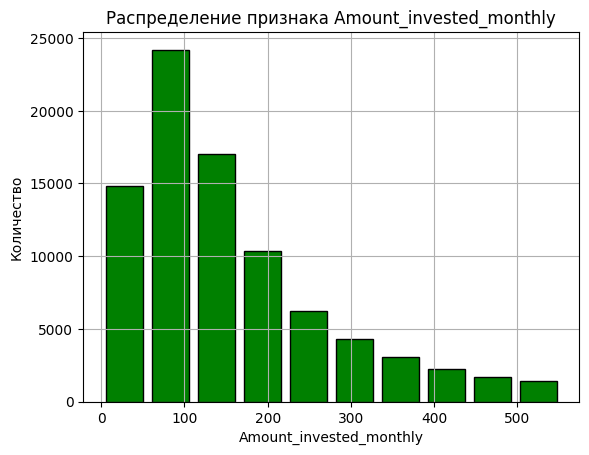

In [ ]:
# Строим гистограмму распределения признака Amount_invested_monthly
plt.hist(df['Amount_invested_monthly'], bins = 10, rwidth = 0.8, edgecolor = 'black', color = 'g')
plt.xlabel('Amount_invested_monthly')
plt.ylabel('Количество')
plt.title('Распределение признака Amount_invested_monthly')
plt.grid()

In [ ]:
re_df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.median())) #Заменяем все значения NaN на медиану по группам, записываем в датафрейм для восстанровленных данных

In [ ]:
re_df['Amount_invested_monthly'].info() #Убедимся, что все значения восстановлены

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Amount_invested_monthly
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


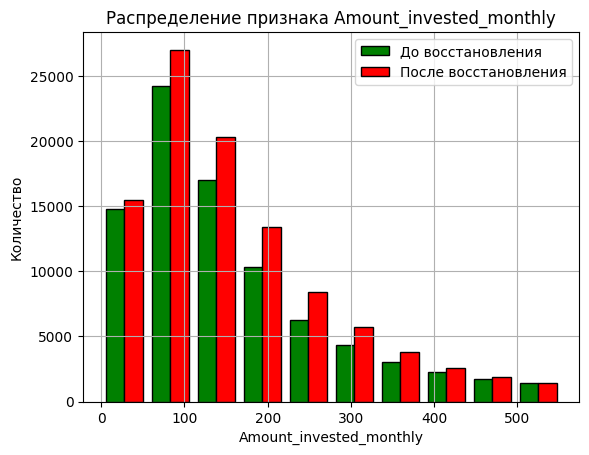

In [ ]:
# Строим 2 гистограммы: восстанволенный и не восстановленный признак
plt.hist([df['Amount_invested_monthly'], re_df['Amount_invested_monthly']], color = ['g', 'r'], edgecolor = 'black', rwidth = 0.8)
plt.xlabel('Amount_invested_monthly')
plt.ylabel('Количество')
plt.title('Распределение признака Amount_invested_monthly')
plt.grid()
plt.legend(['До восстановления', 'После восстановления'])

Восстановление 'Type_of_Loan'

In [ ]:
df['Type_of_Loan'].info() #Просмтариваем информацию признака

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Type_of_Loan
Non-Null Count  Dtype 
--------------  ----- 
88592 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [ ]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna(df['Type_of_Loan'].mode()[0]) #Заменяем все значения Nan на моду
df['Type_of_Loan'].info() # Смотрим инфорамцию о восстановленном признаке

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Type_of_Loan
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


**Задание №7.**

Определить наличие статистических выбросов.
Использовать графический и статистический методы.

Признак по варианту: Num_of_Delayed_Payment


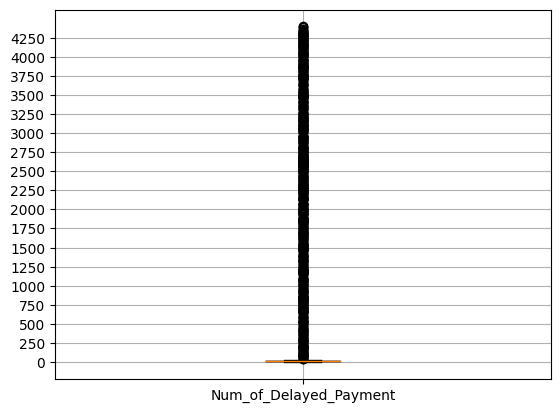

In [ ]:
# Строим диаграмму boxplot
plt.boxplot(df_t7['Num_of_Delayed_Payment'][df_t7['Num_of_Delayed_Payment'].notna()], labels = ['Num_of_Delayed_Payment'])
plt.yticks(np.arange(0,4500, 250))
plt.grid()

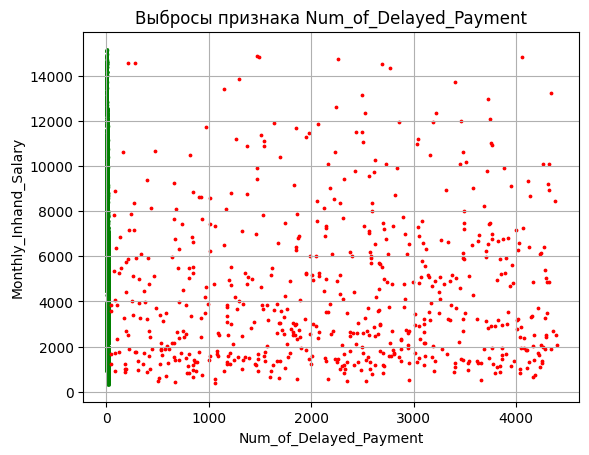

In [ ]:
Q1 = df_t7['Num_of_Delayed_Payment'].quantile(0.25)  # Вычисляем первый квартиль (25-й процентиль) для столбца 'Num_of_Delayed_Payment' в DataFrame df_t7
Q3 = df_t7['Num_of_Delayed_Payment'].quantile(0.75)  # Вычисляем третий квартиль (75-й процентиль) для столбца 'Num_of_Delayed_Payment' в DataFrame df_t7
IQR = Q3 - Q1  # Вычисляем межквартильный размах (IQR)

# Определяем границы аномальных значений
lower_bound = Q1 - 1.5 * IQR  # Нижняя граница для определения выбросов (1.5 IQR ниже первого квартиля)
upper_bound = Q3 + 1.5 * IQR  # Верхняя граница для определения выбросов (1.5 IQR выше третьего квартиля)

outliers = df_t7[(df_t7['Num_of_Delayed_Payment'] < lower_bound) | (df_t7['Num_of_Delayed_Payment'] > upper_bound)]  # Создаем DataFrame outliers, содержащий строки из df_t7, где значения в столбце 'Num_of_Delayed_Payment' выходят за границы выбросов

#Строим график выбросов
plt.scatter(df_t7['Num_of_Delayed_Payment'], df_t7['Monthly_Inhand_Salary'], s = 1, c='g', alpha=0.3)  # График всех точек
plt.scatter(outliers['Num_of_Delayed_Payment'], outliers['Monthly_Inhand_Salary'], color='red', label='Выбросы', s=3)  # График выбросов
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Monthly_Inhand_Salary')
plt.title('Выбросы признака Num_of_Delayed_Payment')
plt.grid()


**Задание №8.**

Закодировать категориальные признаки.

Payment_of_Min_Amount


In [ ]:
df['Payment_of_Min_Amount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Payment_of_Min_Amount
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [ ]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].astype('category') # Меняем тип признака на category
df['Payment_of_Min_Amount'].cat.categories # Просматриваем категории

Index(['NM', 'No', 'Yes'], dtype='object')

In [ ]:
df['Payment_of_Min_Amount_code']= df['Payment_of_Min_Amount'].cat.codes # Создаем столбец с кодами и заполняем его кодами категорий

In [ ]:
df[['Payment_of_Min_Amount', 'Payment_of_Min_Amount_code']].value_counts() #просматрвиаем значения

Payment_of_Min_Amount  Payment_of_Min_Amount_code
Yes                    2                             52326
No                     1                             35667
NM                     0                             12007
Name: count, dtype: int64

**Задание №9.**

Определить эмпирическое распределение признака, подобрать теоретическое распределение и оценить степень их близости.

Num_of_Delayed_Payment

In [ ]:
rasp = df['Num_of_Delayed_Payment'].value_counts(normalize=True).sort_index(ascending=True)  # Вычисляем эмпирическое распределение 'Num_of_Delayed_Payment'
poisson_unique = rasp.index  # Сохраняем уникальные значения 'Num_of_Delayed_Payment'
poisson_empf = rasp.values  # Сохраняем частоты (вероятности) для каждого уникального значения
Num_of_Delayed_Payment_MEAN = df['Num_of_Delayed_Payment'].mean()  # Вычисляем среднее значение 'Num_of_Delayed_Payment'
poisson_t = sts.poisson.rvs(Num_of_Delayed_Payment_MEAN, size=500)  # Генерируем 500 случайных чисел из распределения Пуассона
poisson_pmf = sts.poisson.pmf(poisson_t, Num_of_Delayed_Payment_MEAN)  # Вычисляем вероятности для сгенерированных случайных чисел

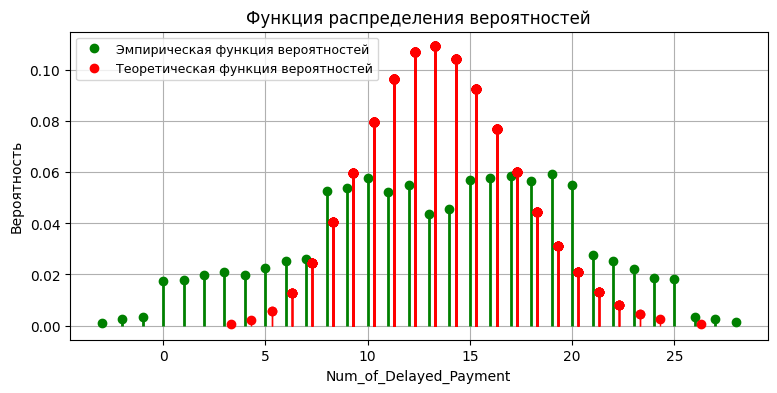

In [ ]:
# Строим график эмпирической и теоретической функций вероятности
plt.figure(figsize=(9,4))
plt.plot(poisson_unique, poisson_empf, 'og', label = 'Эмпирическая функция вероятностей')
plt.vlines(poisson_unique, 0, poisson_empf, colors = 'g', lw = 2)
plt.plot(poisson_t+0.3, poisson_pmf, 'or', label = 'Теоретическая функция вероятностей')
plt.vlines(poisson_t+0.3, 0, poisson_pmf, colors = 'r', lw = 1)
plt.title('Функция распределения вероятностей')
plt.legend(fontsize=9)
plt.ylabel('Вероятность')
plt.xlabel('Num_of_Delayed_Payment')
plt.grid()

Видно, что распределения хоть и похожи, но в большей степени не близки между собой.

**Задание №10.**

Выбрать любые два количественных признака и оценить наличие и степень их зависимости.

Провести визуальный анализ зависимости. Сделать вывод.

Написать функции для расчета коэффициента корреляции Пирсона, Спирмена, Кендалла.

Вычислить требуемые коэффициенты с использованием написанных функций и встроенных средств Python. Сделать вывод.




Text(0.5, 0, 'Num_of_Delayed_Payment')

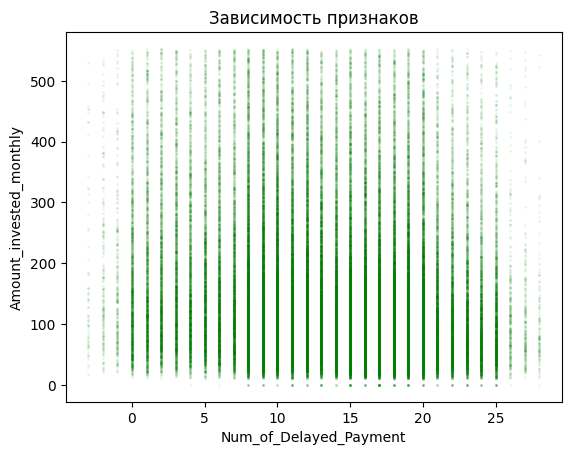

In [ ]:
# Строим график зависимости признаков Num_of_Delayed_Payment и Amount_invested_monthly
plt.scatter(df['Num_of_Delayed_Payment'], df['Amount_invested_monthly'], c='g', s=1.5, alpha=0.05)
plt.title('Зависимость признаков')
plt.ylabel('Amount_invested_monthly')
plt.xlabel('Num_of_Delayed_Payment')

Видим, что визуально зависимости между признаками нет.

Кэффициент Пирсона

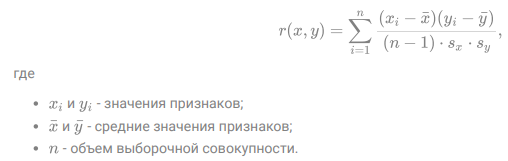

In [ ]:
df[['Num_of_Delayed_Payment','Amount_invested_monthly']].corr(method = 'pearson') #Вычисляем коэф Пирсона встроенной функцией

,Num_of_Delayed_Payment,Amount_invested_monthly
Num_of_Delayed_Payment,1.000000,-0.136597
Amount_invested_monthly,-0.136597,1.000000


In [ ]:
def pearsonr(x, y):
  # Создаем DataFrame для удобства работы с пропусками
    df_temp = pd.DataFrame({'x': x, 'y': y})

    # Удаляем строки с пропусками (NaN) в x или y
    df_temp = df_temp.dropna()

     # Извлекаем очищенные данные
    x = df_temp['x']
    y = df_temp['y']

    # Вычисляем средние значения векторов
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Вычисляем суммы квадратов отклонений от средних значений
    sum_of_squares_x = np.sum((x - mean_x) ** 2)
    sum_of_squares_y = np.sum((y - mean_y) ** 2)

    # Вычисляем произведение отклонений от средних значений
    product_of_deviations = np.sum((x - mean_x) * (y - mean_y))

    # Вычисляем коэффициент корреляции Пирсона
    pearsonr = product_of_deviations / np.sqrt(sum_of_squares_x * sum_of_squares_y)

    return pearsonr
pearsonr(df['Num_of_Delayed_Payment'], df['Amount_invested_monthly'])

-0.13659721727069107

Коэффициент Спирмена

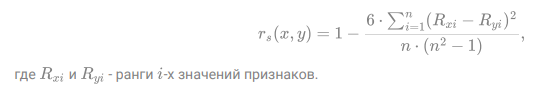

In [ ]:
df[['Num_of_Delayed_Payment','Amount_invested_monthly']].corr(method = 'spearman')

,Num_of_Delayed_Payment,Amount_invested_monthly
Num_of_Delayed_Payment,1.0000,-0.1451
Amount_invested_monthly,-0.1451,1.0000


In [ ]:
def spearmanr(x, y):
    # Создаем DataFrame для удобства работы с пропусками
    df_temp = pd.DataFrame({'x': x, 'y': y})

    # Удаляем строки с пропусками (NaN) в x или y
    df_temp = df_temp.dropna()

    # Извлекаем очищенные данные
    x = df_temp['x']
    y = df_temp['y']

    # Вычисляем ранги для каждой выборки.
    x_ranks = x.rank()
    y_ranks = y.rank()

    # Вычисляем разности между рангами.
    d = x_ranks - y_ranks

    # Вычисляем сумму квадратов разностей.
    d2 = d.pow(2).sum()

    # Вычисляем коэффициент Спирмана.
    n = len(x)
    r = 1 - (6 * d2) / (n * (n**2 - 1))

    return r

spearmanr(df['Amount_invested_monthly'], df['Num_of_Delayed_Payment'])

-0.14378505029621658

Коэффициент Кендалла

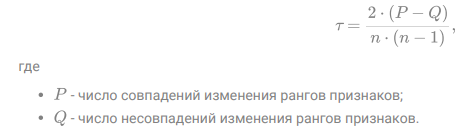

In [ ]:
df[['Num_of_Delayed_Payment','Amount_invested_monthly']].corr(method = 'kendall')

,Num_of_Delayed_Payment,Amount_invested_monthly
Num_of_Delayed_Payment,1.000000,-0.099062
Amount_invested_monthly,-0.099062,1.000000


In [ ]:
def kendall_corr(x, y):
  # Создаем DataFrame для удобства работы с пропусками
    df_temp = pd.DataFrame({'x': x, 'y': y})

    # Удаляем строки с пропусками (NaN) в x или y
    df_temp = df_temp.dropna()

    # Извлекаем очищенные данные
    x = df_temp['x']
    y = df_temp['y']

    n = len(x)  # Длина выборок (предполагается одинаковая)
    concordant = 0  # Инициализация счетчика согласованных пар
    discordant = 0  # Инициализация счетчика несогласованных пар
    x = np.array(x)  # Преобразование в NumPy массивы для удобства
    y = np.array(y)
    for i in range(n - 1):  # Итерируемся по всем парам элементов
        # Сравниваем пары (x[i], y[i]) и (x[j], y[j]), где j > i
        concordant += np.sum(((x[i] - x[i+1:]) * (y[i] - y[i+1:]) > 0))  # Считаем согласованные пары
        discordant += np.sum(((x[i] - x[i+1:]) * (y[i] - y[i+1:]) < 0))  # Считаем несогласованные пары
    tau = (2*(concordant - discordant)) / (n * (n - 1))  # Вычисляем коэффициент корреляции Кендалла
    return tau

kendall_corr(df['Num_of_Delayed_Payment'], df['Amount_invested_monthly'])

-0.09680343288791328

Значения коэффициентов говорят о небольшой отрицательной корреляции, но значение близко к нулевой зависимости.

**Задание №11.**

Выбрать любой количественный и категориальный (с 3-мя и более категориями) признаки и оценить наличие и степень их зависимости. Использовать графический метод и показатели зависимости.

Провести визуальный анализ на основе сравнения гистограмм, графиков функций распределения, графиков "ящик с усами". Сделать вывод.

Написать функцию для расчета корреляционного отношения.
Вычислить корреляционное отношение с использованием написанной функции. Сделать вывод.


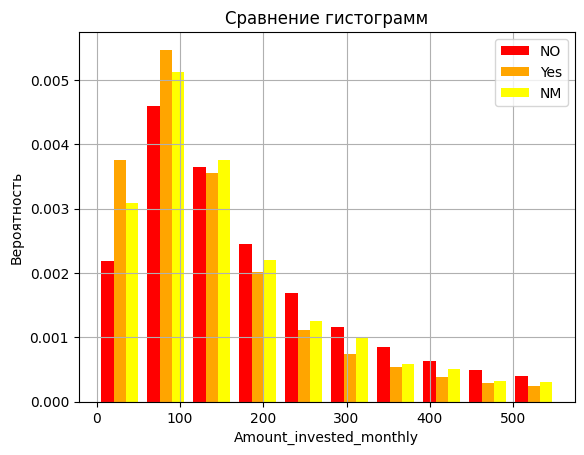

In [ ]:
#Строим график гистограмм, которые показывают распределение значений в столбце 'Amount_invested_monthly' для трех групп данных из DataFrame df, разделенных по признаку 'Payment_of_Min_Amount'.
df_no = df['Amount_invested_monthly'][df['Payment_of_Min_Amount']=='No']
df_yes = df['Amount_invested_monthly'][df['Payment_of_Min_Amount']=='Yes']
df_nm = df['Amount_invested_monthly'][df['Payment_of_Min_Amount']=='NM']

plt.hist([df_no, df_yes, df_nm], density = True, color = ['r','orange' , 'yellow'])
plt.title('Сравнение гистограмм')
plt.ylabel('Вероятность')
plt.xlabel('Amount_invested_monthly')
plt.grid()
plt.legend(['NO', 'Yes', 'NM'])

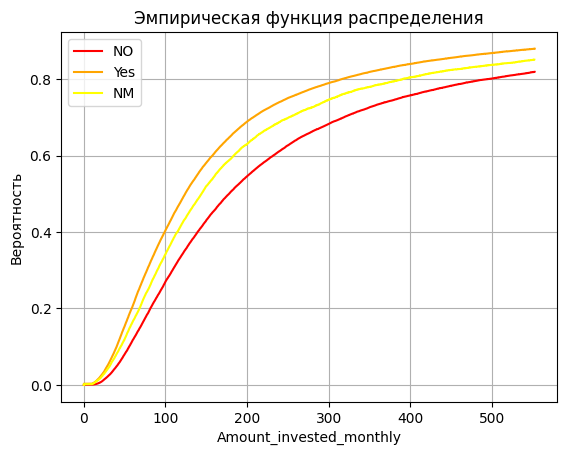

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF  # Импортируем класс ECDF для построения эмпирической функции распределения

# Создаем объекты ECDF для каждой группы 'Payment_of_Min_Amount':
ecdf_y = ECDF(df['Amount_invested_monthly'][df['Payment_of_Min_Amount']=='No'])  # Группа 'No'
ecdf_n = ECDF(df['Amount_invested_monthly'][df['Payment_of_Min_Amount']=='Yes'])  # Группа 'Yes'
ecdf_nm = ECDF(df['Amount_invested_monthly'][df['Payment_of_Min_Amount']=='NM'])  # Группа 'NM'

# Строим графики эмпирических функций распределения:
plt.step(ecdf_y.x, ecdf_y.y, c='r')  # График для группы 'No' (красный цвет)
plt.step(ecdf_n.x, ecdf_n.y, c='orange')  # График для группы 'Yes' (оранжевый цвет)
plt.step(ecdf_nm.x, ecdf_nm.y, c='yellow')  # График для группы 'NM' (желтый цвет)

plt.title('Эмпирическая функция распределения')
plt.ylabel('Вероятность')
plt.xlabel('Amount_invested_monthly')
plt.grid()
plt.legend(['NO', 'Yes', 'NM'])

<Axes: title={'center': 'Amount_invested_monthly'}, xlabel='Payment_of_Min_Amount'>

<Figure size 1000x1500 with 0 Axes>

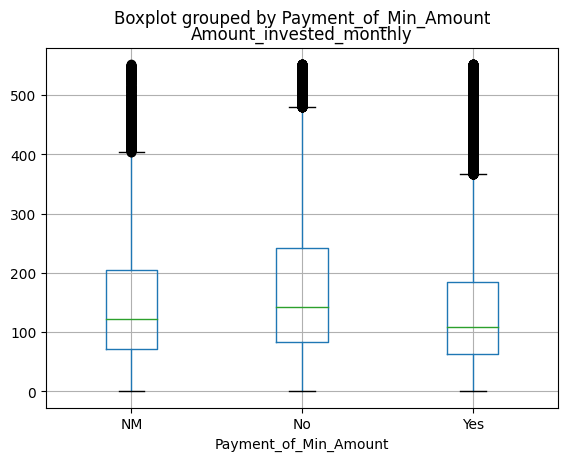

In [ ]:
# Строим "ящики с усами" для 'Amount_invested_monthly', сгруппированные по 'Payment_of_Min_Amount':
plt.figure(figsize=(10,15))  # Создаем новую фигуру для графика
df.boxplot('Amount_invested_monthly', by = 'Payment_of_Min_Amount')

Видим по графикам, что зависимости между признаками практически нет.

In [ ]:
def correlation_ratio(categorical_series, continuous_series):  # Определяем функцию для расчета корреляционного отношения

    categories = categorical_series.unique()  # Получаем список уникальных значений категориальной переменной
    overall_mean = continuous_series.mean()  # Вычисляем среднее значение непрерывной переменной
    between_group_variance = 0  # Инициализируем переменную для межгрупповой дисперсии

    for category in categories:  # Проходим по каждому уникальному значению категориальной переменной
        category_values = continuous_series[categorical_series == category]  # Выбираем значения непрерывной переменной, соответствующие текущей категории
        category_mean = category_values.mean()  # Вычисляем среднее значение для текущей категории
        between_group_variance += len(category_values) * (category_mean - overall_mean) ** 2  # Добавляем вклад текущей категории в межгрупповую дисперсию

    total_variance = ((continuous_series - overall_mean) ** 2).sum()  # Вычисляем общую дисперсию непрерывной переменной
    correlation_ratio = np.sqrt(between_group_variance / total_variance)  # Вычисляем корреляционное отношение

    return correlation_ratio  # Возвращаем значение корреляционного отношения
correlation_ratio(df['Payment_of_Min_Amount'], df['Amount_invested_monthly'])

0.15210609679469295

По вычесленному корреляционному отношению также видим, что зависимость незначительная и ее практически нет.

**Задание №12.**

Выбрать любые два категориальных признака и оценить наличие и степень их зависимости.

Провести визуальный анализ зависимости. Сделать вывод.

Написать функции для расчета коэффициента ассоциации, коэффициента контингенции, коэффициента взаимной сопряженности Чупрова, коэффициента взаимной сопряженности Пирсона.

Вычислить требуемые коэффициенты с использованием написанных функций. Сделать вывод.


In [ ]:
df['Occupation'] = np.where(df['Occupation']=='_______', np.nan, df['Occupation'])    # Избавляемся от ошибочных записей признака Occupation
#Создаем таблицу сопряженности
cont = pd.crosstab(index=df['Credit_Score'],  # Указываем, что значения 'Credit_Score' будут использоваться для строк таблицы
                   columns=df['Occupation'],  # Указываем, что значения 'Occupation' будут использоваться для столбцов таблицы
                   normalize='columns')  # Нормализуем значения в таблице по столбцам
cont #Просматриваем таблицу

Occupation,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer
Credit_Score,,,,,,,,,,,,,,,
Good,0.179876,0.180016,0.181877,0.177756,0.186142,0.174927,0.192769,0.176730,0.183827,0.162772,0.186297,0.187785,0.178917,0.183910,0.142226
Poor,0.299633,0.272856,0.287410,0.272877,0.304252,0.307094,0.283484,0.275285,0.289972,0.301383,0.263960,0.282524,0.304969,0.304907,0.302294
Standard,0.520491,0.547128,0.530714,0.549368,0.509606,0.517979,0.523747,0.547985,0.526201,0.535845,0.549743,0.529690,0.516114,0.511183,0.555480


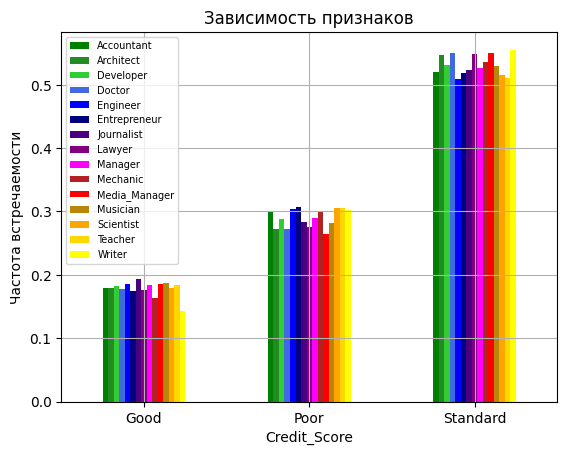

In [ ]:
# Строим столбчатую диаграмму для таблицы сопряженности
cont.plot.bar(rot=0, color=['green','forestgreen','limegreen','royalblue','b','navy','indigo','purple','magenta','firebrick', 'red', 'darkgoldenrod','orange','gold','yellow'])

plt.title('Зависимость признаков')
plt.ylabel('Частота встречаемости')
plt.legend(fontsize=7)
plt.grid()

Видим, что зависимости между признаками практически нет.


В данном случае мы не можем посчитать коэффициенты контингенции и ассоциации, так как они используются для признаки имеют ровно по 2 значения.

In [ ]:
# Функция для расчета коэффициента ассоциации
def association(cont):
  K_a = (cont.iloc[0,0]*cont.iloc[1,1] - cont.iloc[0,1]*cont.iloc[1,0]) /\
  (cont.iloc[0,0]*cont.iloc[1,1]+cont.iloc[0,1]*cont.iloc[1,0])
  return K_a

In [ ]:
# Функция для расчета коэффициента контингенции
def contingent(cont):
  h = (cont.iloc[0,0]*cont.iloc[1,1]-cont.iloc[0,1]*cont.iloc[1,0])
  z = np.sort((cont.iloc[2,0]*cont.iloc[2,1])*(cont.iloc[0,1]*cont.iloc[1,2]))
  K_k = h/z
  return K_k

Коэффициент взаимной сопряженности Пирсона:

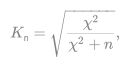

In [ ]:
def pirson(cont, df):  # Определяем функцию pirson, которая принимает таблицу сопряженности и DataFrame
    chi2 = chi2_contingency(cont)[0]  # Вычисляем статистику хи-квадрат для таблицы сопряженности
    k = np.sqrt(chi2 / (chi2 + len(df)))  # Вычисляем коэффициент Пирсона k
    return k  # Возвращаем значение коэффициента Пирсона

pirson(cont,df)

0.0005267002215855357

Коэффициент взаимной сопряженности Чупрова:

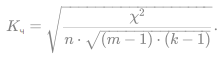

In [ ]:
def chuprov(cont, df):  # Определяем функцию chuprov, которая принимает таблицу сопряженности и DataFrame
    chi2 = chi2_contingency(cont)[0]  # Вычисляем статистику хи-квадрат для таблицы сопряженности
    k = np.sqrt(chi2 / (len(df) * np.sqrt((cont.shape[0] - 1) * (cont.shape[1] - 1))))  # Вычисляем коэффициент Чупрова k
    return k  # Возвращаем значение коэффициента Чупрова

chuprov(cont,df)

0.00022896761134059653

Вычисленные коэффициенты также показали, что зависимость крайне мала и можно утверждать, что ее нет.